+ Data preprocessing

불필요 칼럼제거, 장소명 결측치 제거, 컬럼 정리, 년월 분리

|**변수명**|**값 설명**|
|:-----|:-----|
|**위치좌표 X축값**|위도값|
|**위치좌표 Y축값**|경도값|
|**구분**| 시설의 용도를 구분하여 설명함.|
|**장소명**|새섬, 문섬, 범섬, 섶섬 등등|
|**소재지**|세부 주소|
|**year**|데이터 업데이트 날짜|
|**month**|데이터 업데이트 날짜 중 월을 분류|
|**day**|데이터 업데이트 날짜 중 일을 분류|
|**dayofweek**|데이터 업데이트 날짜 중 일을 숫자로 분류 ex) 0은 월요일|

   ## 분석방향

- 장소명, X축,Y축은 folium 팝업 등으로 활용생각.
- 구분은 시설을 구분하여 어떤 시설이 많고, 시설 종류에 따라 주변 유동인구가 어떤 상관관계가 있는지 추측.
- 데이터기준일자는 시계열에 활용되거나 기간별로 방문인구 분석에 쓰일 것이라 생각듬.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

In [72]:
plt.rcParams['font.family'] = 'NanumGothic'

In [2]:
%matplotlib inline

## 데이터 불러오기

In [7]:
ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: DCC6-5FA5

 C:\Users\user\Desktop\datascience\multicampus_4 디렉터리

2021-07-14  오전 11:50    <DIR>          .
2021-07-14  오전 11:50    <DIR>          ..
2021-07-14  오전 11:45    <DIR>          .ipynb_checkpoints
2021-07-14  오전 11:45            32,690 9_제주_관광을_위한_날짜별_ 지역_추천_ 데이터_동준 .ipynb
2021-07-14  오전 11:45            94,331 BC카드 데이터 전처리_조아진.ipynb
2021-07-14  오전 11:45           342,149 Jeju_for_new_ceo(장은준).ipynb
2021-07-14  오전 11:50            24,498 Jeju_POI.ipynb
2021-07-14  오전 11:45           843,127 상권분석을 위한 유동인구에 따른 카드 매출액 변화 데이터 활용.ipynb
2021-07-14  오전 11:45            87,019 제주_예비창업자를_위한_업종별_카드_매출과_매장수_데이터_전처리.ipynb
               6개 파일           1,423,814 바이트
               3개 디렉터리  69,871,345,664 바이트 남음


In [3]:
df=pd.read_csv("제주특별자치도_제주도장소(POI)데이터_20151231.csv",encoding='cp949',low_memory=False)

In [4]:
df.head()

,장소 POI에 대한 ID 구분 번호 체계,위치좌표 X축값,위치좌표 Y축값,구분,장소명,소재지,데이터기준일자
0,3,126.568803,33.236546,교통시설,동방파제,제주특별자치도 서귀포시 서귀동 758-2,2015-12-31
1,4,126.562554,33.235071,지명관련,새섬,제주특별자치도 서귀포시 서귀동 산 3-3,2015-12-31
2,5,126.599675,33.230314,지명관련,섶섬,제주특별자치도 서귀포시 보목동 산 1,2015-12-31
3,6,126.565891,33.226031,지명관련,문섬,제주특별자치도 서귀포시 서귀동 산 4,2015-12-31
4,7,126.516395,33.218414,지명관련,범섬,제주특별자치도 서귀포시 법환동 산 2,2015-12-31


In [5]:
df.shape

(74439, 7)

## 필요없는 칼럼 삭제

In [6]:
df_2 = df.drop(['장소 POI에 대한 ID 구분 번호 체계 '], axis=1)

In [7]:
df_2.head()

,위치좌표 X축값,위치좌표 Y축값,구분,장소명,소재지,데이터기준일자
0,126.568803,33.236546,교통시설,동방파제,제주특별자치도 서귀포시 서귀동 758-2,2015-12-31
1,126.562554,33.235071,지명관련,새섬,제주특별자치도 서귀포시 서귀동 산 3-3,2015-12-31
2,126.599675,33.230314,지명관련,섶섬,제주특별자치도 서귀포시 보목동 산 1,2015-12-31
3,126.565891,33.226031,지명관련,문섬,제주특별자치도 서귀포시 서귀동 산 4,2015-12-31
4,126.516395,33.218414,지명관련,범섬,제주특별자치도 서귀포시 법환동 산 2,2015-12-31


## 결측치 제거

In [8]:
place_list=df_2['장소명'].unique().tolist()
# place_list

In [9]:
len(df['장소명'].unique().tolist())

65772

In [10]:
df_2=df_2[~df_2['장소명'].isin(['1', '2', '3','4','5','6','7','8','9'])]
df_2

,위치좌표 X축값,위치좌표 Y축값,구분,장소명,소재지,데이터기준일자
0,126.568803,33.236546,교통시설,동방파제,제주특별자치도 서귀포시 서귀동 758-2,2015-12-31
1,126.562554,33.235071,지명관련,새섬,제주특별자치도 서귀포시 서귀동 산 3-3,2015-12-31
2,126.599675,33.230314,지명관련,섶섬,제주특별자치도 서귀포시 보목동 산 1,2015-12-31
3,126.565891,33.226031,지명관련,문섬,제주특별자치도 서귀포시 서귀동 산 4,2015-12-31
4,126.516395,33.218414,지명관련,범섬,제주특별자치도 서귀포시 법환동 산 2,2015-12-31
...,...,...,...,...,...,...
74434,126.542149,33.492701,교육기관,제주CMS에듀케이션,제주특별자치도 제주시 아라이동 3012-7,2015-12-31
74435,126.507533,33.248077,자동차관련,이마트서귀포점전기자동차충전기,제주특별자치도 서귀포시 법환동 841-2,2015-12-31
74436,126.520938,33.517848,자동차관련,이마트제주점전기자동차충전기,제주특별자치도 제주시 삼도이동 1264,2015-12-31
74437,126.282677,33.288644,쇼핑/편의,제주영어마을지에스25,제주특별자치도 서귀포시 대정읍 구억리 산 11,2015-12-31


In [11]:
real_list=[]

for i in range(1,1001):
    if str(i) in place_list:
        real_list.append(str(i))

print(real_list)
        

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18']


In [12]:
df_2=df_2[~df_2['장소명'].isin(['10', '11', '12', '13', '14', '15', '16', '17', '18'])]

In [13]:
df_2=df_2[~df_2['장소명'].isin(['-'])]

In [14]:
df_2=df_2[~df_2['장소명'].isin(['N6',
 'N4',
 'N5',
 'N7',
 'S4',
 'S3',
 'S5',
 'N2',
 'N3',
 'N8',
 'N1',
 'S9',
 'S1',
 'S2',
 'S6',
 'S7',
 'S8',
 'E9',
 'N9',
 'E4',
 'E3',
 'E1',
 'E2',
 'E5',
 'E6',
 'E8',
 'E7'])]

In [15]:
# df_2['장소명'].unique().tolist()

In [16]:
pd.set_option('display.max_rows',300)

# df_2.sample(300)

## 결측치 결과 확인

In [17]:
df_2.isnull().sum()

위치좌표 X축값     0
위치좌표 Y축값     0
구분           0
장소명          0
소재지          0
데이터기준일자      0
dtype: int64

## 날짜 년월 분리

In [18]:
df_2['데이터기준일자']

0        2015-12-31
1        2015-12-31
2        2015-12-31
3        2015-12-31
4        2015-12-31
            ...    
74434    2015-12-31
74435    2015-12-31
74436    2015-12-31
74437    2015-12-31
74438    2015-12-31
Name: 데이터기준일자, Length: 73760, dtype: object

In [19]:
import pandas as pd
df_2['데이터기준일자'] = pd.to_datetime(df_2['데이터기준일자'], errors='coerce')

In [20]:
df_2['year'] = df_2['데이터기준일자'].dt.year #연도
df_2['month'] = df_2['데이터기준일자'].dt.month #월
df_2['day'] = df_2['데이터기준일자'].dt.day #일
df_2['dayofweek'] = df_2['데이터기준일자'].dt.dayofweek #요일 (월 = 0)

In [21]:
df_2

,위치좌표 X축값,위치좌표 Y축값,구분,장소명,소재지,데이터기준일자,year,month,day,dayofweek
0,126.568803,33.236546,교통시설,동방파제,제주특별자치도 서귀포시 서귀동 758-2,2015-12-31,2015,12,31,3
1,126.562554,33.235071,지명관련,새섬,제주특별자치도 서귀포시 서귀동 산 3-3,2015-12-31,2015,12,31,3
2,126.599675,33.230314,지명관련,섶섬,제주특별자치도 서귀포시 보목동 산 1,2015-12-31,2015,12,31,3
3,126.565891,33.226031,지명관련,문섬,제주특별자치도 서귀포시 서귀동 산 4,2015-12-31,2015,12,31,3
4,126.516395,33.218414,지명관련,범섬,제주특별자치도 서귀포시 법환동 산 2,2015-12-31,2015,12,31,3
...,...,...,...,...,...,...,...,...,...,...
74434,126.542149,33.492701,교육기관,제주CMS에듀케이션,제주특별자치도 제주시 아라이동 3012-7,2015-12-31,2015,12,31,3
74435,126.507533,33.248077,자동차관련,이마트서귀포점전기자동차충전기,제주특별자치도 서귀포시 법환동 841-2,2015-12-31,2015,12,31,3
74436,126.520938,33.517848,자동차관련,이마트제주점전기자동차충전기,제주특별자치도 제주시 삼도이동 1264,2015-12-31,2015,12,31,3
74437,126.282677,33.288644,쇼핑/편의,제주영어마을지에스25,제주특별자치도 서귀포시 대정읍 구억리 산 11,2015-12-31,2015,12,31,3


In [22]:
df_2 = df_2.drop(['데이터기준일자'], axis=1)

In [23]:
df_2.to_csv('제주_POI.csv', encoding='cp949', index=False)

In [24]:
df_2.head(10)

,위치좌표 X축값,위치좌표 Y축값,구분,장소명,소재지,year,month,day,dayofweek
0,126.568803,33.236546,교통시설,동방파제,제주특별자치도 서귀포시 서귀동 758-2,2015,12,31,3
1,126.562554,33.235071,지명관련,새섬,제주특별자치도 서귀포시 서귀동 산 3-3,2015,12,31,3
2,126.599675,33.230314,지명관련,섶섬,제주특별자치도 서귀포시 보목동 산 1,2015,12,31,3
3,126.565891,33.226031,지명관련,문섬,제주특별자치도 서귀포시 서귀동 산 4,2015,12,31,3
4,126.516395,33.218414,지명관련,범섬,제주특별자치도 서귀포시 법환동 산 2,2015,12,31,3
5,126.222533,33.241524,공공기관,일과2리어촌계,제주특별자치도 서귀포시 대정읍 일과리 1419-3,2015,12,31,3
6,126.270455,33.170157,지명관련,가파도,제주특별자치도 서귀포시 대정읍 가파리 288,2015,12,31,3
7,126.268257,33.117671,지명관련,마라도,제주특별자치도 서귀포시 대정읍 가파리 617,2015,12,31,3
8,126.270300,33.425837,교육기관,수원초등학교,제주특별자치도 제주시 한림읍 대림리 1591,2015,12,31,3
9,126.312871,33.420172,교육기관,어도초등학교,제주특별자치도 제주시 애월읍 봉성리 3276,2015,12,31,3


## 변수 분석

In [25]:
df_2gubun=df_2['구분'].sort_values().value_counts()
df_2gubun

쇼핑/편의         11606
음식점           10451
주택관련           7666
교통시설           6171
도로시설           6035
지명관련           5370
관광/숙박          4622
기업             4542
자동차관련          3487
교육기관           2815
의료/복지          2245
공공기관           2068
금융기관           1651
레져/스포츠         1551
문화/종교/예술       1468
농공시설           1374
치안기관            279
공원/산/동.식물원      268
언론기관             53
공사중명칭            38
Name: 구분, dtype: int64

<AxesSubplot:>

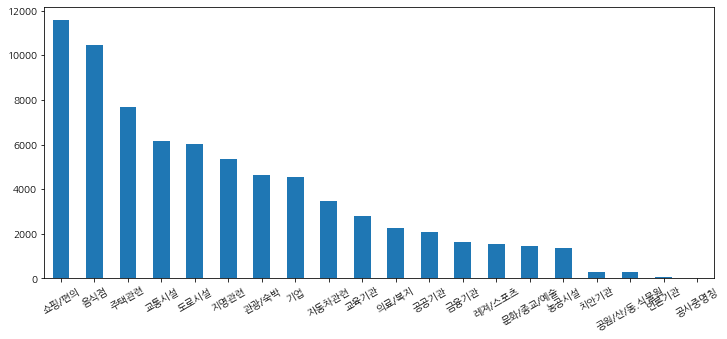

In [26]:
plt.figure(figsize=(12,5))
df_2gubun.plot.bar(rot=30)

In [27]:
df_place = df_2['장소명'].sort_values().value_counts()
df_place

노상주차장         431
무료주차장         335
공영주차장          77
공중화장실          76
SK주유소          71
             ... 
일성드림타운          1
동인스파월드          1
제주학생문화원주차장      1
남제주축산           1
안덕계곡삼거리         1
Name: 장소명, Length: 65727, dtype: int64

In [28]:
df_place_head=df_place.head(10)
df_place_head

노상주차장      431
무료주차장      335
공영주차장       77
공중화장실       76
SK주유소       71
GS주유소       55
개방화장실       53
주차장         43
SOiL주유소     34
새마을금고       34
Name: 장소명, dtype: int64

<AxesSubplot:>

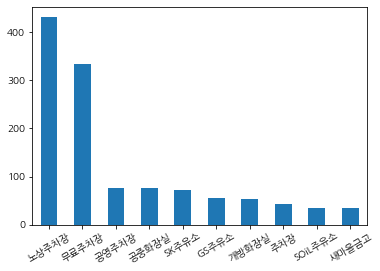

In [29]:
df_place_head.plot.bar(rot=30)

<AxesSubplot:ylabel='장소명'>

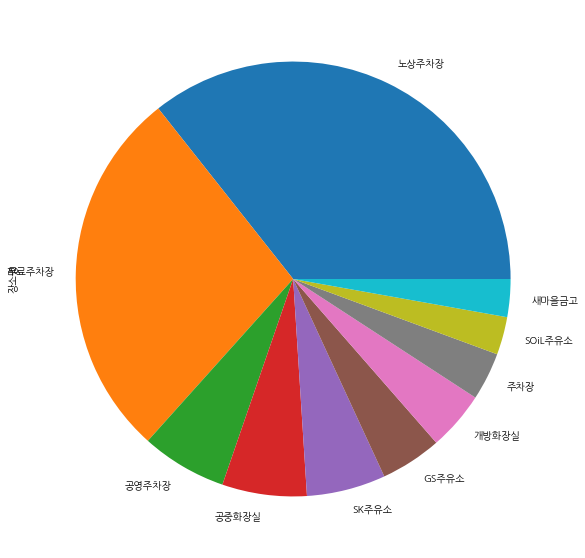

In [30]:
plt.figure(figsize=(10,10))
df_place_head.plot.pie()

In [31]:
df_2['소재지']

0           제주특별자치도 서귀포시 서귀동 758-2
1           제주특별자치도 서귀포시 서귀동 산 3-3
2             제주특별자치도 서귀포시 보목동 산 1
3             제주특별자치도 서귀포시 서귀동 산 4
4             제주특별자치도 서귀포시 법환동 산 2
                   ...            
74434      제주특별자치도 제주시 아라이동 3012-7
74435       제주특별자치도 서귀포시 법환동 841-2
74436       제주특별자치도 제주시 삼도이동 1264 
74437    제주특별자치도 서귀포시 대정읍 구억리 산 11
74438      제주특별자치도 제주시 아라이동 1622-8
Name: 소재지, Length: 73760, dtype: object

In [32]:
df_2_sample=df_2.sample(500)
df_2_sample

,위치좌표 X축값,위치좌표 Y축값,구분,장소명,소재지,year,month,day,dayofweek
30733,126.530776,33.489051,도로시설,동아아파트103동입구,제주특별자치도 제주시 이도이동 1909-100,2015,12,31,3
16742,126.579321,33.520115,주택관련,삼정빌라,제주특별자치도 제주시 삼양이동 2146-1,2015,12,31,3
3644,126.200434,33.271712,문화/종교/예술,무릉교회,제주특별자치도 서귀포시 대정읍 무릉리 3297-3,2015,12,31,3
60475,126.279528,33.250140,공공기관,안성우체국,제주특별자치도 서귀포시 대정읍 안성리 1598,2015,12,31,3
43211,126.617354,33.536231,의료/복지,신촌청소년복지센터,제주특별자치도 제주시 조천읍 신촌리 2321-5,2015,12,31,3
...,...,...,...,...,...,...,...,...,...
64791,126.512664,33.496192,교통시설,오라동사무소,제주특별자치도 제주시 오라일동 1149-2,2015,12,31,3
31314,126.520651,33.499133,음식점,원영식당,제주특별자치도 제주시 삼도일동 573,2015,12,31,3
50708,126.833166,33.326224,쇼핑/편의,현대이용원,제주특별자치도 서귀포시 표선면 표선리 604,2015,12,31,3
30183,126.718059,33.489937,교통시설,목선동,제주특별자치도 제주시 조천읍 선흘리 338-3,2015,12,31,3


<AxesSubplot:xlabel='위치좌표 X축값 ', ylabel='위치좌표 Y축값 '>

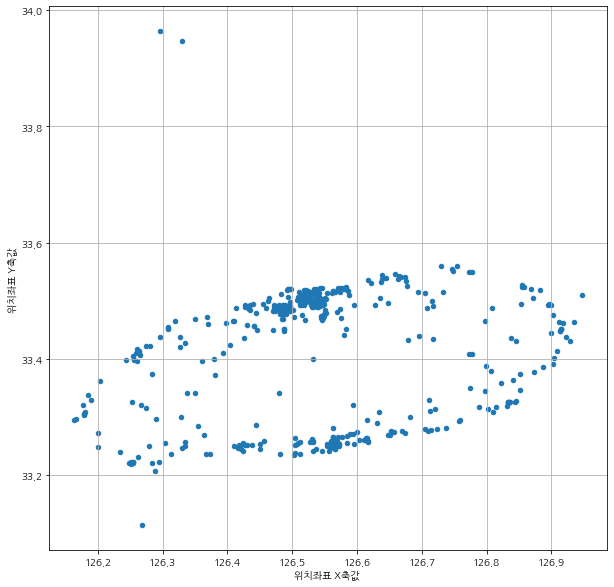

In [33]:
df_2_sample[['위치좌표 X축값 ','위치좌표 Y축값 ']].plot.scatter(x='위치좌표 X축값 ',y='위치좌표 Y축값 ',figsize=(10,10),grid=True)

In [34]:
import folium

df_2_sample['위치좌표 X축값 '].mean()
df_2_sample['위치좌표 Y축값 '].mean()

33.416256532

In [35]:
map=folium.Map(location=[df_2_sample['위치좌표 Y축값 '].mean(),df_2_sample['위치좌표 X축값 '].mean()],zoom_start=10)


for n in df_2_sample.index:
    name=df_2_sample.loc[n,'구분']
    
    location=[df_2_sample.loc[n,'위치좌표 Y축값 '], df_2_sample.loc[n,'위치좌표 X축값 ']]
    adress=df_2_sample.loc[n,'소재지']
    popup=f'{name}-{adress}'

    folium.Marker(
        location = location,
        popup = popup,
    ).add_to(map)
map

<AxesSubplot:>

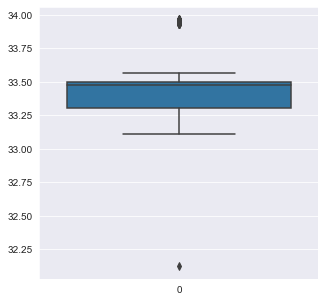

In [36]:
plt.figure(figsize=(5,5))

sns.set_style('darkgrid')
sns.boxplot(data=df_2['위치좌표 Y축값 '])

<AxesSubplot:>

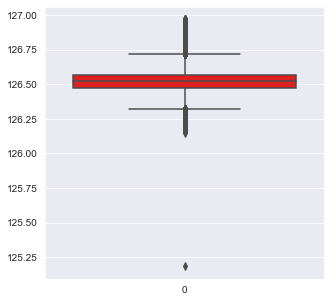

In [37]:
plt.figure(figsize=(5,5))

sns.set_style('darkgrid')
sns.boxplot(data=df_2['위치좌표 X축값 '],color='red')

{'whiskers': [<matplotlib.lines.Line2D at 0x219d0a54250>,
 'caps': [<matplotlib.lines.Line2D at 0x219d0a54910>,
 'boxes': [<matplotlib.lines.Line2D at 0x219d0a46e80>],
 'medians': [<matplotlib.lines.Line2D at 0x219d0a54fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x219d0a5e370>],
 'means': []}

<Figure size 1080x576 with 0 Axes>

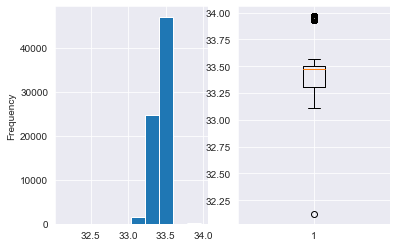

In [38]:
plt.figure(figsize = (15,8))
fig, ax = plt.subplots(1,2)

df_2['위치좌표 Y축값 '].plot(kind = 'hist', ax = ax[0])
plt.boxplot(df['위치좌표 Y축값 '])

In [39]:
first_quantile = df_2['위치좌표 Y축값 '].quantile(0.25)
third_quantile = df_2['위치좌표 Y축값 '].quantile(0.75)
print('1분위수 : ', first_quantile)
print('3분위수 : ', third_quantile)

df_quantile = df_2[(df_2['위치좌표 Y축값 '] >= first_quantile) & (df_2['위치좌표 Y축값 '] <= third_quantile)]
df_quantile.head()

1분위수 :  33.30338675
3분위수 :  33.500108


,위치좌표 X축값,위치좌표 Y축값,구분,장소명,소재지,year,month,day,dayofweek
8,126.270300,33.425837,교육기관,수원초등학교,제주특별자치도 제주시 한림읍 대림리 1591,2015,12,31,3
9,126.312871,33.420172,교육기관,어도초등학교,제주특별자치도 제주시 애월읍 봉성리 3276,2015,12,31,3
10,126.293435,33.442419,교육기관,귀덕초등학교,제주특별자치도 제주시 한림읍 귀덕리 1118,2015,12,31,3
11,126.330457,33.435404,교육기관,납읍초등학교,제주특별자치도 제주시 애월읍 납읍리 1504-2,2015,12,31,3
12,126.437909,33.476643,지명관련,참오랭이,제주특별자치도 제주시 외도일동 21,2015,12,31,3


In [40]:
df_2.shape

(73760, 9)

In [41]:
df_quantile.shape

(36887, 9)

### 데이터수가 많이 줄어드는 걸 보니 위도,경도에서 이상치 제거는 맞지 않는듯하다.

In [42]:
df_sample3=df_quantile.sample(500)

In [43]:
map=folium.Map(location=[df_sample3['위치좌표 Y축값 '].mean(),df_sample3['위치좌표 X축값 '].mean()],zoom_start=10)


for n in df_sample3.index:
    name=df_sample3.loc[n,'구분']
    
    location=[df_sample3.loc[n,'위치좌표 Y축값 '], df_sample3.loc[n,'위치좌표 X축값 ']]
    adress=df_sample3.loc[n,'소재지']
    popup=f'{name}-{adress}'

    folium.Marker(
        location = location,
        popup = popup,
    ).add_to(map)
map

In [44]:
df_2[df_2['소재지'].str.contains('추자면')].shape

(290, 9)

In [45]:
df_2[df_2['소재지'].str.contains('추자면')].head(15)

,위치좌표 X축값,위치좌표 Y축값,구분,장소명,소재지,year,month,day,dayofweek
13152,126.329370,33.944656,쇼핑/편의,추자도수협간이위판장,제주특별자치도 제주시 추자면 신양리 434-17,2015,12,31,3
13153,126.329008,33.944772,교통시설,신양항여객선대합실,제주특별자치도 제주시 추자면 신양리 434-1,2015,12,31,3
13154,126.328720,33.944831,교통시설,무료주차장,제주특별자치도 제주시 추자면 신양리 434-4,2015,12,31,3
13191,126.328008,33.945280,기업,한일해운,제주특별자치도 제주시 추자면 신양리 434-9,2015,12,31,3
13192,126.327908,33.945630,교통시설,신양1리,제주특별자치도 제주시 추자면 신양리 434-7,2015,12,31,3
13193,126.328495,33.945639,공공기관,신양1리경로당,제주특별자치도 제주시 추자면 신양리 392-1,2015,12,31,3
13194,126.329108,33.945664,관광/숙박,사계절민박,제주특별자치도 제주시 추자면 신양리 422-4,2015,12,31,3
13195,126.328883,33.945772,쇼핑/편의,부두식품,제주특별자치도 제주시 추자면 신양리 423-1,2015,12,31,3
13196,126.329233,33.946255,공공기관,하추자보건진료소,제주특별자치도 제주시 추자면 신양리 413-3,2015,12,31,3
13197,126.330320,33.945697,관광/숙박,하추자민박,제주특별자치도 제주시 추자면 신양리 207,2015,12,31,3


In [46]:
df_2[df_2['소재지'].str.contains('제주시')].value_counts().sum()

49546

In [47]:
df_2.shape

(73760, 9)

In [48]:
b=df_2[df_2['소재지'].str.contains('서귀포시')].value_counts().sum()
b

24214

In [49]:
a=df_2[df_2['소재지'].str.contains('제주시|서귀포시')].value_counts().sum()
a

73760

In [50]:
df_3= pd.DataFrame({'제주시':[a-b],
                   '서귀포시':[b]})

df_3

,제주시,서귀포시
0,49546,24214


## 시구분, 동구분 추가

In [115]:
sido_list.clear()

In [ ]:
# sido_list=[]
# sido = df_2['소재지'].str.contains('제주시')
# for i in range(len(df_2)):

#     if sido.iloc[i] == True:
#         sido_list.append('제주시')
        
    
#     elif sido.iloc[i] == False:
#         sido_list.append('서귀포시')
        
#     else:
#         pass
    
# print(sido_list)

In [83]:
len(df_2)

73760

In [89]:
df_2['소재지'].str.contains('제주시')[1]

False

In [51]:
sojaeji = []

for i in df_2['소재지'].str.split(' '):
    sojaeji.append(i[1])    

In [52]:
df_2['시구분'] = sojaeji

In [53]:
sojaeji2 = []

for i in df_2['소재지'].str.split(' '):
    sojaeji2.append(i[2])   

In [54]:
df_2['동구분'] = sojaeji2

In [55]:
df_2

,위치좌표 X축값,위치좌표 Y축값,구분,장소명,소재지,year,month,day,dayofweek,시구분,동구분
0,126.568803,33.236546,교통시설,동방파제,제주특별자치도 서귀포시 서귀동 758-2,2015,12,31,3,서귀포시,서귀동
1,126.562554,33.235071,지명관련,새섬,제주특별자치도 서귀포시 서귀동 산 3-3,2015,12,31,3,서귀포시,서귀동
2,126.599675,33.230314,지명관련,섶섬,제주특별자치도 서귀포시 보목동 산 1,2015,12,31,3,서귀포시,보목동
3,126.565891,33.226031,지명관련,문섬,제주특별자치도 서귀포시 서귀동 산 4,2015,12,31,3,서귀포시,서귀동
4,126.516395,33.218414,지명관련,범섬,제주특별자치도 서귀포시 법환동 산 2,2015,12,31,3,서귀포시,법환동
...,...,...,...,...,...,...,...,...,...,...,...
74434,126.542149,33.492701,교육기관,제주CMS에듀케이션,제주특별자치도 제주시 아라이동 3012-7,2015,12,31,3,제주시,아라이동
74435,126.507533,33.248077,자동차관련,이마트서귀포점전기자동차충전기,제주특별자치도 서귀포시 법환동 841-2,2015,12,31,3,서귀포시,법환동
74436,126.520938,33.517848,자동차관련,이마트제주점전기자동차충전기,제주특별자치도 제주시 삼도이동 1264,2015,12,31,3,제주시,삼도이동
74437,126.282677,33.288644,쇼핑/편의,제주영어마을지에스25,제주특별자치도 서귀포시 대정읍 구억리 산 11,2015,12,31,3,서귀포시,대정읍


### 칼럼 순서 정리

In [56]:
columns=['위치좌표 X축값 ','위치좌표 Y축값 ','장소명','소재지','시구분','동구분','year','month','day','dayofweek']
df_2=df_2[columns]
df_2.head()

,위치좌표 X축값,위치좌표 Y축값,장소명,소재지,시구분,동구분,year,month,day,dayofweek
0,126.568803,33.236546,동방파제,제주특별자치도 서귀포시 서귀동 758-2,서귀포시,서귀동,2015,12,31,3
1,126.562554,33.235071,새섬,제주특별자치도 서귀포시 서귀동 산 3-3,서귀포시,서귀동,2015,12,31,3
2,126.599675,33.230314,섶섬,제주특별자치도 서귀포시 보목동 산 1,서귀포시,보목동,2015,12,31,3
3,126.565891,33.226031,문섬,제주특별자치도 서귀포시 서귀동 산 4,서귀포시,서귀동,2015,12,31,3
4,126.516395,33.218414,범섬,제주특별자치도 서귀포시 법환동 산 2,서귀포시,법환동,2015,12,31,3


In [57]:
df_2

,위치좌표 X축값,위치좌표 Y축값,장소명,소재지,시구분,동구분,year,month,day,dayofweek
0,126.568803,33.236546,동방파제,제주특별자치도 서귀포시 서귀동 758-2,서귀포시,서귀동,2015,12,31,3
1,126.562554,33.235071,새섬,제주특별자치도 서귀포시 서귀동 산 3-3,서귀포시,서귀동,2015,12,31,3
2,126.599675,33.230314,섶섬,제주특별자치도 서귀포시 보목동 산 1,서귀포시,보목동,2015,12,31,3
3,126.565891,33.226031,문섬,제주특별자치도 서귀포시 서귀동 산 4,서귀포시,서귀동,2015,12,31,3
4,126.516395,33.218414,범섬,제주특별자치도 서귀포시 법환동 산 2,서귀포시,법환동,2015,12,31,3
...,...,...,...,...,...,...,...,...,...,...
74434,126.542149,33.492701,제주CMS에듀케이션,제주특별자치도 제주시 아라이동 3012-7,제주시,아라이동,2015,12,31,3
74435,126.507533,33.248077,이마트서귀포점전기자동차충전기,제주특별자치도 서귀포시 법환동 841-2,서귀포시,법환동,2015,12,31,3
74436,126.520938,33.517848,이마트제주점전기자동차충전기,제주특별자치도 제주시 삼도이동 1264,제주시,삼도이동,2015,12,31,3
74437,126.282677,33.288644,제주영어마을지에스25,제주특별자치도 서귀포시 대정읍 구억리 산 11,서귀포시,대정읍,2015,12,31,3


### 동구분 분석

In [58]:
df_2['동구분'].value_counts()

연동       4791
노형동      4157
애월읍      3934
한림읍      2960
이도이동     2949
         ... 
복지로3길       1
동상효로        1
원당로5길       1
도련3길        1
무근성1길       1
Name: 동구분, Length: 767, dtype: int64

In [70]:
df_dong=df_2['동구분'].value_counts(ascending=False).head(15)
df_dong

연동      4791
노형동     4157
애월읍     3934
한림읍     2960
이도이동    2949
조천읍     2780
남원읍     2719
대정읍     2606
성산읍     2583
서귀동     2308
구좌읍     2290
일도이동    2264
표선면     2159
안덕면     1880
동홍동     1812
Name: 동구분, dtype: int64

In [78]:
dong_nor=df_2['동구분'].value_counts(normalize=True)*100
dong_nor

연동       6.495390
노형동      5.635846
애월읍      5.333514
한림읍      4.013015
이도이동     3.998102
           ...   
복지로3길    0.001356
동상효로     0.001356
원당로5길    0.001356
도련3길     0.001356
무근성1길    0.001356
Name: 동구분, Length: 767, dtype: float64

In [90]:
dong_A=dong_nor.head(35)

<AxesSubplot:>

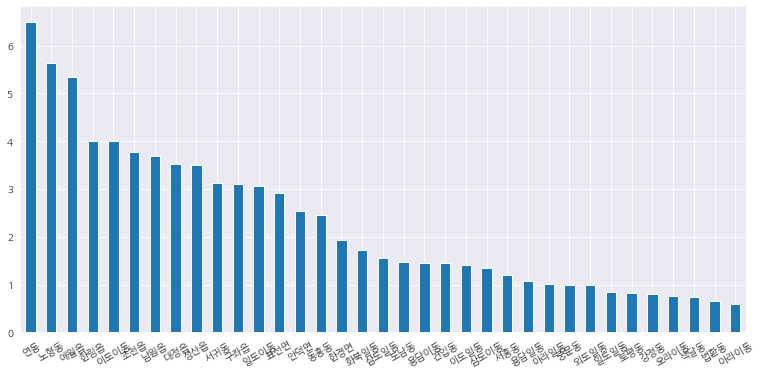

In [92]:
plt.figure(figsize=(13,6))
dong_A.plot.bar(rot= 30)

### 시구분 분석

In [100]:
df_2['시구분'].value_counts()

제주시     49546
서귀포시    24214
Name: 시구분, dtype: int64

<AxesSubplot:>

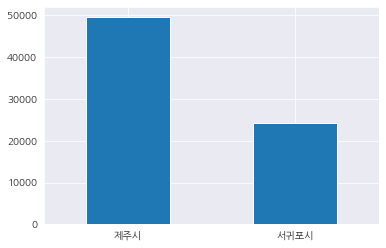

In [105]:
df_2['시구분'].value_counts().plot.bar(rot=0)